<a href="https://colab.research.google.com/github/DewSam/GreenSpaceDetection/blob/main/Green_Spaces_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Governance Aspect – ESG Implementation for Flooding Issues and Consequential Policy Decision-Making
     

#### * Detection of Green Spaces in an Urban Region for Future Urban Revitalization


Goal:
Perform CNN &  Deep learning to classify images into one of the 5 following categories:
   
    0- building
    1- park
    2- pav
    3- trans
    4- water

##### Import Packages:

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
import PIL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
#Read the dataset using image_dataset_from_directory() function

data = tf.keras.utils.image_dataset_from_directory('data', image_size=(30,30))


Found 500 files belonging to 5 classes.


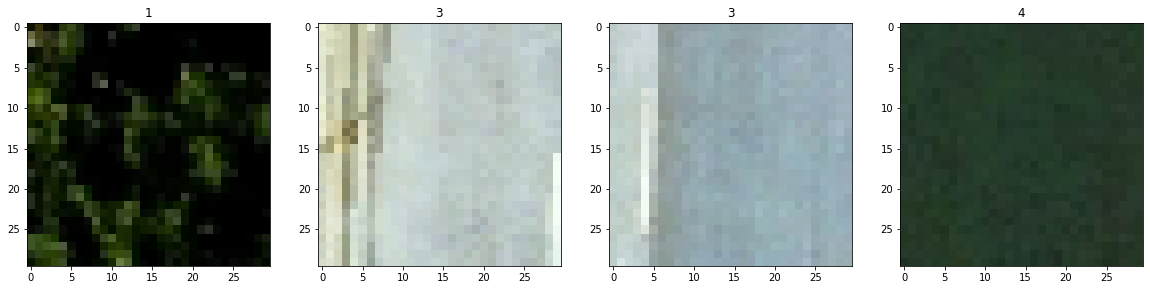

In [ ]:

#iterate over the 4 images in the batch
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#'bldg', 'park', 'pav', 'trans', 'water'

    #0 building
    #1 park
    #2 pav
    #3 trans
    #4 water

#### Examine and understand data

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

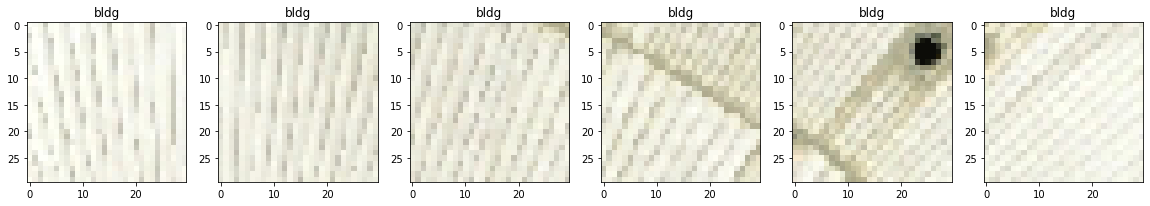

<Figure size 432x288 with 0 Axes>

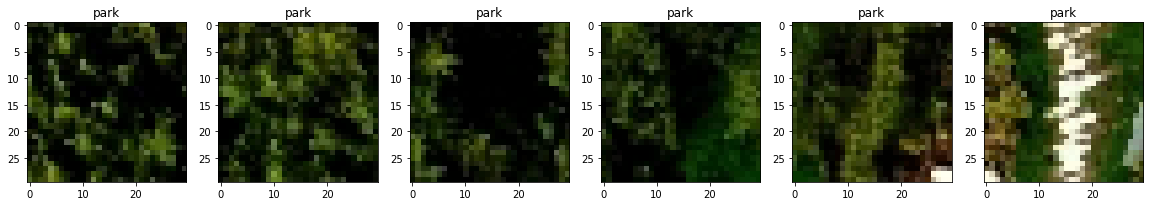

<Figure size 432x288 with 0 Axes>

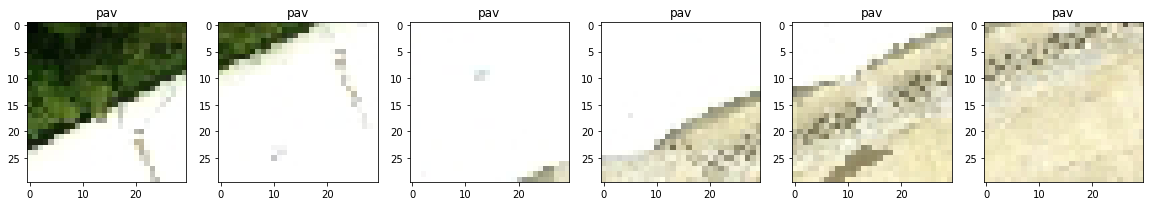

<Figure size 432x288 with 0 Axes>

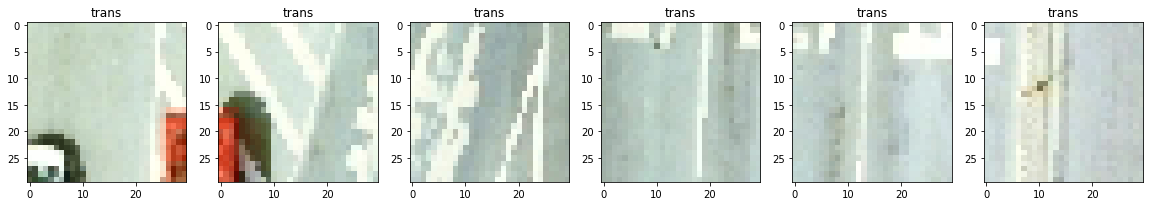

<Figure size 432x288 with 0 Axes>

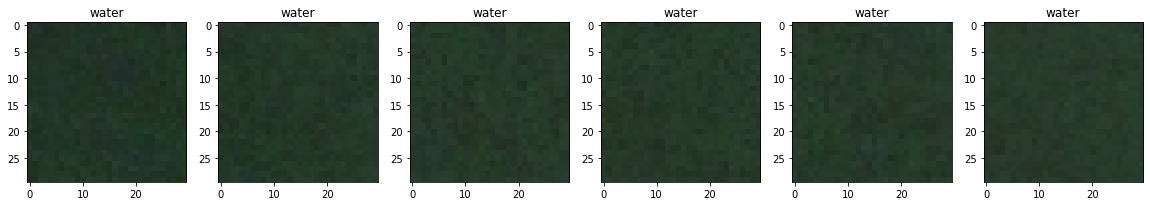

In [ ]:
# images should be saved in their respective class folder in the data big folder
# For example for park images, path is as follows: data/park/

train_dir = 'data'
classes = os.listdir(train_dir)
class_id = 0
fig = plt.figure()

directory=os.listdir('data')
for each in directory:
    plt.figure()
    currentFolder = 'data/' + each

    fig, ax = plt.subplots(ncols=6, figsize=(20,20))

#Show 6 images of each class
    for i, file in enumerate(os.listdir(currentFolder)[0:6]):
        fullpath = currentFolder+ "/" + file
        img=cv2.imread(fullpath)
        ax[i].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        ax[i].title.set_text(classes[class_id])


    class_id = class_id+1

In [ ]:
#The total number of the obs. is 500, 100 per each class - we have 5 classes

#### Preprocessing

In [ ]:
#4. Scale Data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

#5. Split Data
train_size = int(len(data)*.8) #80% training dataset
val_size = int(len(data)*.2)   #20% validation

train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [ ]:
len(train)*32

384

In [ ]:
len(val)*32

96

#### Build an input pipeline

In [ ]:
#Bulding the model (Standard):

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(30,30,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(30, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 16)        

#### Train the model

In [ ]:
hist = model.fit(train, epochs=600, validation_data=val) #epoch 600

Epoch 1/600
12/12 [==============================] - 1s 23ms/step - loss: 1.5368 - accuracy: 0.2161 - val_loss: 1.4170 - val_accuracy: 0.2500
Epoch 2/600
12/12 [==============================] - 0s 17ms/step - loss: 1.4506 - accuracy: 0.2370 - val_loss: 1.3931 - val_accuracy: 0.3750
Epoch 3/600
12/12 [==============================] - 0s 17ms/step - loss: 1.3449 - accuracy: 0.3802 - val_loss: 1.3304 - val_accuracy: 0.3854
Epoch 4/600
12/12 [==============================] - 0s 16ms/step - loss: 1.2282 - accuracy: 0.4010 - val_loss: 1.1871 - val_accuracy: 0.4271
Epoch 5/600
12/12 [==============================] - 0s 17ms/step - loss: 1.1123 - accuracy: 0.4115 - val_loss: 1.1223 - val_accuracy: 0.3750
Epoch 6/600
12/12 [==============================] - 0s 17ms/step - loss: 1.0686 - accuracy: 0.3620 - val_loss: 1.0922 - val_accuracy: 0.3958
Epoch 7/600
12/12 [==============================] - 0s 17ms/step - loss: 0.9835 - accuracy: 0.5365 - val_loss: 1.0032 - val_accuracy: 0.5833
Epoch 

12/12 [==============================] - 0s 17ms/step - loss: 0.1089 - accuracy: 0.9479 - val_loss: 0.0948 - val_accuracy: 0.9583
Epoch 116/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0885 - accuracy: 0.9661 - val_loss: 0.1067 - val_accuracy: 0.9479
Epoch 117/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0784 - accuracy: 0.9714 - val_loss: 0.0752 - val_accuracy: 0.9583
Epoch 118/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0749 - accuracy: 0.9714 - val_loss: 0.1077 - val_accuracy: 0.9583
Epoch 119/600
12/12 [==============================] - 0s 17ms/step - loss: 0.1009 - accuracy: 0.9479 - val_loss: 0.0614 - val_accuracy: 0.9896
Epoch 120/600
12/12 [==============================] - 0s 16ms/step - loss: 0.1042 - accuracy: 0.9609 - val_loss: 0.0559 - val_accuracy: 0.9896
Epoch 121/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0888 - accuracy: 0.9661 - val_loss: 0.0408 - val_accuracy: 0.9896
Epoch 

Epoch 172/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0645 - accuracy: 0.9740 - val_loss: 0.0625 - val_accuracy: 0.9688
Epoch 173/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0880 - accuracy: 0.9661 - val_loss: 0.2395 - val_accuracy: 0.8854
Epoch 174/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0797 - accuracy: 0.9740 - val_loss: 0.0529 - val_accuracy: 0.9792
Epoch 175/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0508 - accuracy: 0.9818 - val_loss: 0.0373 - val_accuracy: 0.9792
Epoch 176/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0608 - accuracy: 0.9818 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 177/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0983 - accuracy: 0.9557 - val_loss: 0.0961 - val_accuracy: 0.9479
Epoch 178/600
12/12 [==============================] - 0s 16ms/step - loss: 0.1003 - accuracy: 0.9505 - val_loss: 0.0339 - val_accuracy:

Epoch 229/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0637 - accuracy: 0.9740 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 230/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0585 - accuracy: 0.9714 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 231/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0434 - val_accuracy: 0.9792
Epoch 232/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0531 - accuracy: 0.9740 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 233/600
12/12 [==============================] - 0s 16ms/step - loss: 0.0300 - accuracy: 0.9922 - val_loss: 0.0468 - val_accuracy: 0.9688
Epoch 234/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0583 - accuracy: 0.9818 - val_loss: 0.0800 - val_accuracy: 0.9688
Epoch 235/600
12/12 [==============================] - 0s 16ms/step - loss: 0.1064 - accuracy: 0.9583 - val_loss: 0.1474 - val_accuracy:

Epoch 286/600
12/12 [==============================] - 0s 17ms/step - loss: 0.1164 - accuracy: 0.9531 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 287/600
12/12 [==============================] - 0s 16ms/step - loss: 0.1931 - accuracy: 0.9427 - val_loss: 0.1927 - val_accuracy: 0.9583
Epoch 288/600
12/12 [==============================] - 0s 17ms/step - loss: 0.1084 - accuracy: 0.9583 - val_loss: 0.0332 - val_accuracy: 0.9896
Epoch 289/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0886 - accuracy: 0.9661 - val_loss: 0.0315 - val_accuracy: 0.9896
Epoch 290/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0727 - accuracy: 0.9688 - val_loss: 0.0888 - val_accuracy: 0.9688
Epoch 291/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0573 - accuracy: 0.9766 - val_loss: 0.1754 - val_accuracy: 0.9062
Epoch 292/600
12/12 [==============================] - 0s 17ms/step - loss: 0.1103 - accuracy: 0.9557 - val_loss: 0.1142 - val_accuracy:

Epoch 343/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0299 - accuracy: 0.9922 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 344/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.9844 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 345/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0360 - accuracy: 0.9844 - val_loss: 0.0239 - val_accuracy: 0.9896
Epoch 346/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0306 - accuracy: 0.9896 - val_loss: 0.0348 - val_accuracy: 0.9896
Epoch 347/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0259 - accuracy: 0.9896 - val_loss: 0.0198 - val_accuracy: 0.9896
Epoch 348/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 349/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0179 - accuracy: 0.9922 - val_loss: 0.0203 - val_accuracy:

Epoch 400/600
12/12 [==============================] - 0s 20ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 401/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 402/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 403/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 404/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0190 - accuracy: 0.9948 - val_loss: 0.0250 - val_accuracy: 0.9896
Epoch 405/600
12/12 [==============================] - 0s 19ms/step - loss: 0.0322 - accuracy: 0.9870 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 406/600
12/12 [==============================] - 0s 21ms/step - loss: 0.0280 - accuracy: 0.9922 - val_loss: 0.0403 - val_accuracy:

Epoch 457/600
12/12 [==============================] - 0s 20ms/step - loss: 0.1769 - accuracy: 0.9245 - val_loss: 0.1317 - val_accuracy: 0.9792
Epoch 458/600
12/12 [==============================] - 0s 24ms/step - loss: 0.0955 - accuracy: 0.9688 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 459/600
12/12 [==============================] - 0s 20ms/step - loss: 0.0862 - accuracy: 0.9714 - val_loss: 0.0469 - val_accuracy: 0.9792
Epoch 460/600
12/12 [==============================] - 0s 22ms/step - loss: 0.0612 - accuracy: 0.9740 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 461/600
12/12 [==============================] - 0s 19ms/step - loss: 0.0329 - accuracy: 0.9922 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 462/600
12/12 [==============================] - 0s 20ms/step - loss: 0.0207 - accuracy: 0.9974 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 463/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0148 - accuracy: 0.9948 - val_loss: 0.0121 - val_accuracy:

Epoch 514/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 515/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 516/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0106 - accuracy: 0.9974 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 517/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 518/600
12/12 [==============================] - 0s 19ms/step - loss: 0.0123 - accuracy: 0.9974 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 519/600
12/12 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 520/600
12/12 [==============================] - 0s 21ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy:

Epoch 571/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.3916e-04 - val_accuracy: 1.0000
Epoch 572/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 573/600
12/12 [==============================] - 0s 19ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 574/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 575/600
12/12 [==============================] - 0s 17ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 576/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.6154e-04 - val_accuracy: 1.0000
Epoch 577/600
12/12 [==============================] - 0s 18ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0037 - val_a

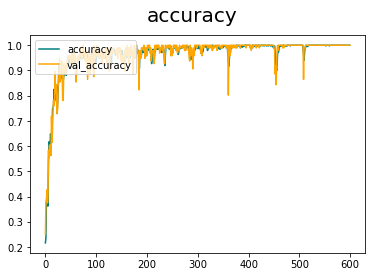

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### Test the model

Found 500 files belonging to 5 classes.


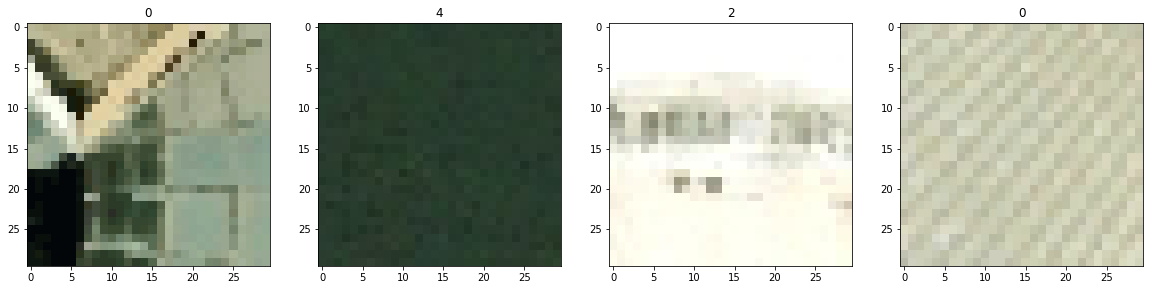

In [ ]:
#Read the images from their respective class folder
# Images should all be saved in the Test_Images folder. e.g. park images should be stored as Test_Images/park/.

test = tf.keras.utils.image_dataset_from_directory('Test_Images', image_size=(30,30))


test_iterator = test.as_numpy_iterator()

batch_test = test_iterator.next()


#Print out the first 4 images in the pipe
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch_test[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch_test[1][idx])

In [ ]:
#4. Scale Data
test = test.map(lambda x,y: (x/255, y)) # preprocessing steps



In [ ]:
predictions = np.array([])
labels =  np.array([])

for x, y in test:
    l =y.numpy()

    array = model.predict(x, batch_size=1, verbose=1) #used the model to predict the image class, each batch contains 32 images
    p = np.argmax(array, axis=1) #report the class with highest probability.

    predictions = np.concatenate([predictions, p]) # create an array with all predictions for the testing data
    labels = np.concatenate([labels, l]) # create an array with all labels
    print(p)
    print(l)
    print('\n\n\n\n\n')

32/32 [==============================] - 0s 988us/step
[4 0 0 0 2 0 4 1 1 1 0 4 3 1 4 2 0 0 2 1 1 2 1 0 1 0 1 3 0 2 0 4]
[4 2 0 0 0 0 4 1 1 1 2 4 0 1 4 2 0 2 2 1 3 0 1 2 1 2 1 0 3 3 3 4]






32/32 [==============================] - 0s 1ms/step
[1 2 0 0 1 3 4 1 0 4 3 1 2 3 4 1 0 3 4 0 3 1 0 3 2 4 1 1 4 3 2 3]
[1 0 0 0 1 3 4 1 2 4 3 1 2 3 4 1 2 3 4 0 3 1 3 3 2 4 1 1 4 3 2 3]






32/32 [==============================] - 0s 835us/step
[0 1 1 1 1 0 3 2 0 1 3 3 0 1 4 0 3 3 1 0 0 3 4 1 0 0 0 1 4 4 0 4]
[2 1 1 1 1 0 3 2 0 1 3 3 2 1 4 0 3 3 1 3 2 3 4 1 0 2 0 1 4 4 0 4]






32/32 [==============================] - 0s 1ms/step
[3 1 4 4 1 0 4 0 3 1 4 0 0 0 2 3 0 3 1 4 2 3 2 1 1 0 2 0 4 4 4 4]
[3 2 4 4 1 0 4 0 3 1 4 0 0 2 2 3 3 3 1 4 2 3 0 1 1 0 2 2 4 4 4 4]






32/32 [==============================] - 0s 950us/step
[4 0 1 0 3 0 0 1 1 0 1 4 0 1 0 4 0 1 0 1 1 0 2 0 0 3 2 3 4 1 4 2]
[4 0 1 3 3 0 2 1 1 2 1 4 3 1 0 4 0 1 3 1 1 0 0 0 2 3 2 3 4 1 4 2]






32/32 [==============================] 

In [ ]:
conf_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()  #Build the confusion matrix

In [ ]:
conf_mat

array([[ 85,   0,  12,   3,   0],
       [  1,  99,   0,   0,   0],
       [ 55,   1,  44,   0,   0],
       [ 25,   1,   4,  70,   0],
       [  0,   0,   0,   0, 100]])

In [ ]:
#Function to plot the confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

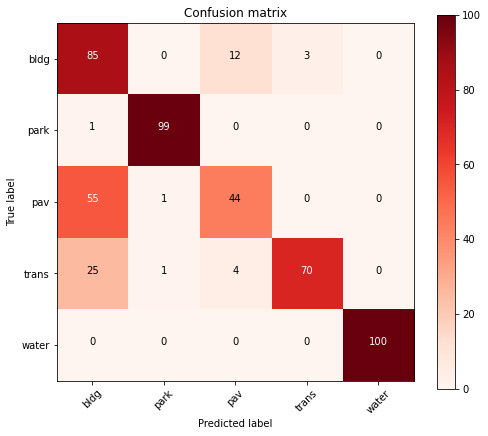

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))

#Call the function - plot_confusion_matrix
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix')
plt.show()

In [ ]:

#Print out the classification report.
from sklearn.metrics import classification_report



print(classification_report(labels, predictions))

              precision    recall  f1-score   support

         0.0       0.51      0.85      0.64       100
         1.0       0.98      0.99      0.99       100
         2.0       0.73      0.44      0.55       100
         3.0       0.96      0.70      0.81       100
         4.0       1.00      1.00      1.00       100

    accuracy                           0.80       500
   macro avg       0.84      0.80      0.80       500
weighted avg       0.84      0.80      0.80       500

